In [74]:
#import libraries

import rasterio as rs
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
from osgeo import gdal
from rasterio.plot import show
import os

print('*********** Libraries were imported successfuly **********')
print('working directory: '+ str(os.getcwd()))

*********** Libraries were imported successfuly **********
working directory: C:\Users\s79631\Documents\Python_ökoneu


**************** Loading classification file *************
**************** Image imported successfuly **************
**********************************************************
*********************** Image data ***********************
Number of bands: 1
Coordinate Reference System: PROJCS["unnamed",GEOGCS["ETRS 1989",DATUM["ETRS 1989",SPHEROID["GRS 1980",6378137,298.257222096042],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",15],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["meters",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Image width:`901
Image height:`501
Number of Pixels:`451401
**********************************************************
************** extracting classification data ************
************ classification successfully loaded **********
Grassland/agr

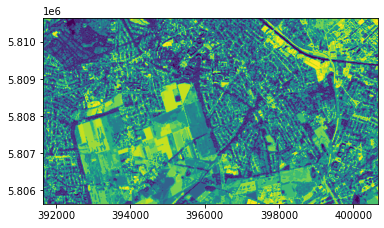

<AxesSubplot:>

In [215]:
#load classification image

print('**************** Loading classification file *************')
gdal.UseExceptions()
img_clas = rs.open ('20200928_sent_ökoneu_mask_etrs89.img')
print('**************** Image imported successfuly **************')

## Print image data
print('**********************************************************')
print('*********************** Image data ***********************')
print('Number of bands: ' + str(img_clas.count))
print('Coordinate Reference System: ' + str(img_clas.crs))
print('Image width:`' + str(img_clas.width))
print('Image height:`' + str(img_clas.height))
print('Number of Pixels:`' + str(int(img_clas.height)*int(img_clas.width)))
print('**********************************************************')

## create groups using mask values from ERDAS classification mask
#grassland = [13,15,18,19,21,22,25,27,28,32,33] for 2015
grassland = [12,13,15,16,17,20,23,25,28,29,31,33]
#tree_canopy = [2,4,7,9,11,12,16]
tree_canopy = [3,5,6,7,8,9]

tree_list = list()
grass_list = list()

## get bands
print('************** extracting classification data ************')
clas_values = img_clas.read(1)

seeker_column = 0
while seeker_column < img.width:
    seeker_row = 0
    while seeker_row < img.height:
        arr = clas_values[seeker_row]
        pos = (seeker_row,seeker_column)
        if arr[seeker_column] in grassland:
            grass_list.append(pos)
        if arr[seeker_column] in tree_canopy:
            tree_list.append(pos)
        seeker_row = seeker_row+1
    seeker_column = seeker_column+1

print('************ classification successfully loaded **********')    
print('Grassland/agriculture values...................'+str(len(grass_list)))   
print('Tree Canopy values.............................'+str(len(tree_list))) 
print('***********************************************************') 
   
print(grass_list[1])
#print((clas_values[200]))
#print(type(clas_values[1]))
#x = clas_values[200] #x = classvalues [row]
#print (x[1]) #value x[column]



#for elementa in (clas_values [200]):
    #if elementa in grassland:
        #print("V")
    #else:
       #print("F")

show(img_clas)

**************** Image imported successfuly **************
**********************************************************
*********************** Image data ***********************
Number of bands: 1
Coordinate Reference System: PROJCS["unnamed",GEOGCS["ETRS 1989",DATUM["ETRS 1989",SPHEROID["GRS 1980",6378137,298.257222096042],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",15],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["meters",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Image width:`901
Image height:`501
Number of Pixels:`451401
**********************************************************


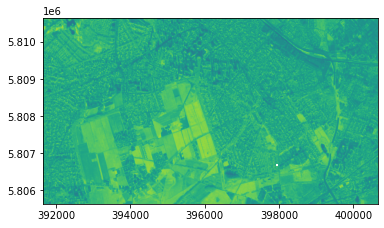

501


In [245]:
##Change directory to file folder
##os.chdir('D:\TEMP\20200324_Sentinel2A')

## open image

gdal.UseExceptions()
img = rs.open ('20200102_Ökoneu_etrs89_ndvi.img')

print('**************** Image imported successfuly **************')

## Print image data
print('**********************************************************')
print('*********************** Image data ***********************')
print('Number of bands: ' + str(img.count))
print('Coordinate Reference System: ' + str(img.crs))
print('Image width:`' + str(img.width))
print('Image height:`' + str(img.height))
print('Number of Pixels:`' + str(int(img.height)*int(img.width)))
print('**********************************************************')
show(img)

## get bands
Index_Values = img.read(1)
print(len(Index_Values))

## stats
from scipy import stats
#stats.describe (Index_Values) #activate just if needed

**********************************************************
****************** Analysing values... *******************
**********************************************************
******************** Analysis completed *******************
**********************************************************
****************Scene analysis results *******************
Scene NDVI [0.7, 1]...................... 88 pixels
Scene NDVI [0.55, 0.7] .................. 18918 pixels
Scene NDVI [0.45-0.55]................... 35173 pixels
Scene NDVI [0.35-0.45]................... 59437 pixels
Scene NDVI [0.25-0.35]................... 98778 pixels
Scene NDVI [<0.25]....................... 239007 pixels
**********************************************************
Mean NDVI (ignore negative values)....... 0.2623434
Scene NDVI (incl. negative values)....... 0.24802133
**********************************************************
Total  area ............................. 4514.01 hectareas
**********************************

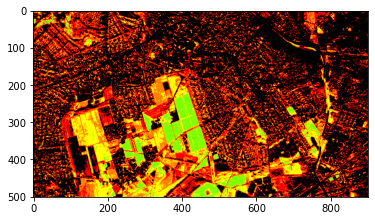

In [247]:
print('**********************************************************')
print('****************** Analysing values... *******************')
print('**********************************************************')

## create classification conters and indexing lists 

very_healthy = 0 # values between [0.7-1]
very_healthy_dic = list()

healthy = 0 # values between [0.55-0.7]
healthy_dic = list()

lightstress = 0 # values between [0.45-0.55]
light_dic = list()

moderatestress = 0 # values between [0.35-0.45]
moderate_dic = list()

heavystress = 0 # values between [0.25-0.35]
heavy_dic = list()

no_veg = 0 # values between [<0.25]
no_veg_dic = list

# create numpy-array for masking for report

output_format = ".png"
t=(img.height, img.width,3)
mask=np.zeros(t,dtype=np.uint8)

#Define Masking Colours

colors= [(0,0,0),(255,0,0),(255,128,0),(255,255,0),(127,255,0),(50,205,50)]

# Classify Pixels
NDVI_tree=list()
NDVI_veg=list()
NDVI_grass=list()
NDVI_neg=list()
NDVI_accum = list()
counter_total= 0
counter_neg= 0

seeker_column = 0
while seeker_column < img.width:
    seeker_row = 0
    while seeker_row < img.height:
        if Index_Values[seeker_row, seeker_column] <= 0.25:
            mask[seeker_row, seeker_column] = colors[0]
            no_veg = no_veg+1
        else:
            if Index_Values[seeker_row, seeker_column] <= 0.35:
                mask[seeker_row, seeker_column] = colors[1]
                heavystress = heavystress+1
            else:
                if Index_Values[seeker_row, seeker_column] <= 0.45:
                    mask[seeker_row, seeker_column] = colors[2]
                    moderatestress = moderatestress + 1
                else:
                    if Index_Values[seeker_row, seeker_column] <= 0.55:
                        mask[seeker_row, seeker_column] = colors[3]
                        lightstress = lightstress + 1
                    else:
                        if Index_Values[seeker_row, seeker_column] <= 0.7:
                            mask[seeker_row, seeker_column] = colors[4]
                            healthy = healthy + 1
                        else:
                            mask[seeker_row, seeker_column] = colors[5]
                            very_healthy = very_healthy + 1
        if Index_Values[seeker_row, seeker_column] >= 0:
            NDVI_accum.append(Index_Values[seeker_row, seeker_column])
            
        NDVI_neg.append(Index_Values[seeker_row, seeker_column])
        seeker_row = seeker_row+1
    seeker_column = seeker_column+1

for elements in tree_list:
    x_pos = elements[0] 
    y_pos = elements[1]
    value = float(Index_Values[x_pos, y_pos])
    if value >= 0:
        NDVI_tree.append(value)
        NDVI_veg.append(value)
    
for elemento in grass_list:
    x_pos = elemento[0] 
    y_pos = elemento[1]
    value = float(Index_Values[x_pos, y_pos])
    if value >= 0:
        NDVI_grass.append(value)
        NDVI_veg.append(value)


#Calculation of vegeation area and non vegetation area
    
veg_area = 10*10/10000*(int(very_healthy)+int(healthy)+int(lightstress)+int(moderatestress)+int(heavystress))
no_veg_area = int(no_veg)*10*10/10000

NDVI_treemean = np.nanmean(NDVI_tree)
NDVI_grassmean = np.nanmean(NDVI_grass)
NDVI_mean = np.nanmean(NDVI_accum)
NDVI_scene = np.nanmean(NDVI_neg)
NDVI_vegmean = np.nanmean(NDVI_veg)

print('******************** Analysis completed *******************')
print('**********************************************************')
print('****************Scene analysis results *******************')
print('Scene NDVI [0.7, 1]...................... ' + str(very_healthy) + " pixels")
print('Scene NDVI [0.55, 0.7] .................. ' + str(healthy) + " pixels")
print('Scene NDVI [0.45-0.55]................... ' + str(lightstress) + " pixels")
print('Scene NDVI [0.35-0.45]................... ' + str(moderatestress) + " pixels")
print('Scene NDVI [0.25-0.35]................... ' + str(heavystress) + " pixels")
print('Scene NDVI [<0.25]....................... ' + str(no_veg) + " pixels")
print('**********************************************************')
print('Mean NDVI (ignore negative values)....... ' + str(NDVI_mean))
print('Scene NDVI (incl. negative values)....... ' + str(NDVI_scene))
print('**********************************************************')
print('Total  area ............................. ' + str(float(no_veg_area)+float(veg_area)) + " hectareas")
print('**********************************************************')
print('                                                          ')

# vegetation analysis

print('**********************************************************')
print('********** Starting Vegetation Analysis ******************')
print('**********************************************************')


grass_area = int(len(grass_list))*10*10/10000
tree_area = int(len(tree_list))*10*10/10000
veg_area2 = grass_area + tree_area

# Values for NDVI tree canopy

counter_1= 0
counter_2= 0
counter_3= 0
counter_4= 0
counter_5= 0
counter_6= 0

for elements in NDVI_tree:
    if elements <= 0.25:
        counter_1 = counter_1+1
    else:
        if elements <= 0.35:
            counter_2 = counter_2+1
        else:
            if elements <= 0.45:
                counter_3 = counter_3 + 1
            else:
                if elements <= 0.55:
                    counter_4 = counter_4 + 1
                else:
                    if elements <= 0.7:
                        counter_5 = counter_5 + 1
                    else:
                        counter_6 = counter_6 + 1
                            
print('**********    Tree canopy NDVI Results    ****************')
print('Tree canopy NDVI [0.7, 1]...................... ' + str(counter_6) + " pixels")
print('Tree canopy NDVI [0.55, 0.7] .................. ' + str(counter_5) + " pixels")
print('Tree canopy NDVI [0.45-0.55]................... ' + str(counter_4) + " pixels")
print('Tree canopy NDVI [0.35-0.45]................... ' + str(counter_3) + " pixels")
print('Tree canopy NDVI [0.25-0.35]................... ' + str(counter_2) + " pixels")
print('Tree canopy NDVI [<0.25]....................... ' + str(counter_1) + " pixels")
print('**********************************************************')
print('Tree canopy area .............................. ' + str(tree_area) + " hectareas")
print('**********************************************************')
print('                                                          ')

# Values for NDVI grassland

counter_1= 0
counter_2= 0
counter_3= 0
counter_4= 0
counter_5= 0
counter_6= 0              

for elements in NDVI_grass:
    if elements <= 0.25:
        counter_1 = counter_1+1
    else:
        if elements <= 0.35:
            counter_2 = counter_2+1
        else:
            if elements <= 0.45:
                counter_3 = counter_3 + 1
            else:
                if elements <= 0.55:
                    counter_4 = counter_4 + 1
                else:
                    if elements <= 0.7:
                        counter_5 = counter_5 + 1
                    else:
                        counter_6 = counter_6 + 1

print('**************    Grassland NDVI results   ***************')
print('**********************************************************')
print('Grassland NDVI [0.7, 1]...................... ' + str(counter_6) + " pixels")
print('Grassland NDVI [0.55, 0.7] .................. ' + str(counter_5) + " pixels")
print('Grassland NDVI [0.45-0.55]................... ' + str(counter_4) + " pixels")
print('Grassland NDVI [0.35-0.45]................... ' + str(counter_3) + " pixels")
print('Grassland NDVI [0.25-0.35]................... ' + str(counter_2) + " pixels")
print('Grassland NDVI [<0.25]....................... ' + str(counter_1) + " pixels")
print('**********************************************************')
print('Grassland area .............................. ' + str(grass_area) + " hectareas")
print('**********************************************************')
print('                                                          ')


print('********** Vegetation Analysis Results *******************')
print('**********************************************************')
print('Mean Grassland NDVI............................' + str(NDVI_grassmean))
print('Mean Tree Canopy NDVI .........................' + str(NDVI_treemean))
print('Mean Vegetation NDVI......................' + str(NDVI_vegmean))
print('**********************************************************')
print('Total Analysed vegetation area ........... ' + str(veg_area2) + " hectareas")

# Plot mask

mask_plot = Image.fromarray(mask, 'RGB')
#mask_plot.save('20201219_Ökoneu_NDVI_mask.png')
plt.imshow(mask_plot)

In [213]:
print(len(NDVI_grass))
print(len(NDVI_tree))

149125
76176


In [214]:
print(len(grass_list))
print(len(tree_list))

157250
86513
